In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [2]:
import re
import csv
import mailbox

In [5]:
china1965=pd.read_csv('income-1965-china.csv')
china2015=pd.read_csv('income-2015-china.csv')
usa1965=pd.read_csv('income-1965-usa.csv')
usa2015=pd.read_csv('income-2015-usa.csv')

In [7]:
china1965.info()
china1965.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income          1000 non-null float64
log10_income    1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [8]:
china1965.max()

income          5.426802
log10_income    0.734544
dtype: float64

In [9]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [10]:
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [11]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [12]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [13]:
china1965.quantile(0.5)

income          0.557477
log10_income   -0.253773
Name: 0.5, dtype: float64

In [14]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [16]:
scipy.stats.percentileofscore(china1965.income,1.5)

95.5

In [17]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [18]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


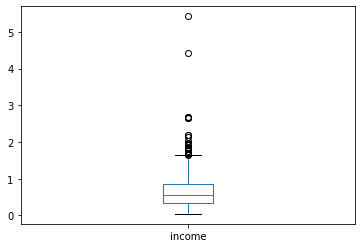

In [19]:
china1965.income.plot(kind='box')

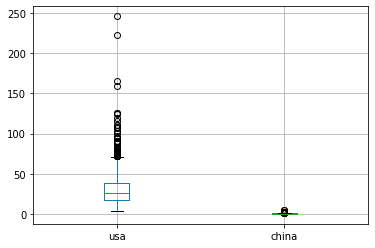

In [20]:
pd.DataFrame({'usa': usa1965.income, 'china': china1965.income}).boxplot()

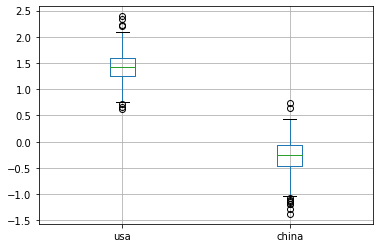

In [21]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

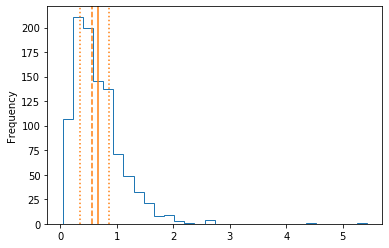

In [27]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

plt.axvline(china1965.income.mean(),c='C1')
plt.axvline(china1965.income.median(),c='C1',linestyle='--')
plt.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
plt.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0, 3, 0.0, 1.2342999882944066)

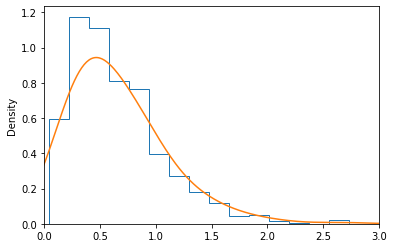

In [31]:
china1965.income.plot(kind='hist',histtype='step',bins=30, density=True)
china1965.income.plot.density(bw_method=0.5)
plt.axis(xmin=0, xmax=3)

([<matplotlib.axis.XTick at 0x2517fb93088>,
 <a list of 9 Text xticklabel objects>)

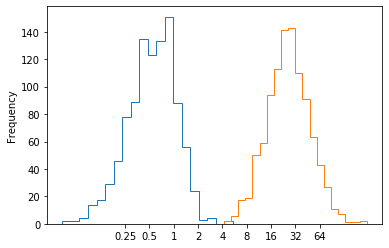

In [33]:
china1965.log10_income.plot.hist(histtype='step', bins=20)
usa1965.log10_income.plot.hist(histtype='step', bins=20)

levels = (0.25, 0.5, 1, 2, 4, 8, 16, 32, 64)
plt.xticks(np.log10(levels), levels)

([<matplotlib.axis.XTick at 0x2517fbfab88>,
 <a list of 9 Text xticklabel objects>)

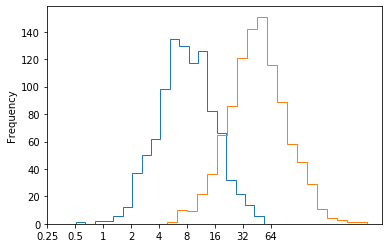

In [34]:
china2015.log10_income.plot.hist(histtype='step', bins=20)
usa2015.log10_income.plot.hist(histtype='step', bins=20)

levels = (0.25, 0.5, 1, 2, 4, 8, 16, 32, 64)
plt.xticks(np.log10(levels), levels)

In [35]:
gapminder = pd.read_csv('gapminder.csv')


In [36]:
china_pop2015 = float(gapminder.query('country=="China" and year==2015').population)

In [37]:
usa_pop2015 = float(gapminder.query('country=="United States" and year==2015').population)

In [38]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [40]:
china2015['weight']= china_pop2015 / len(china2015)
usa2015['weight']= usa_pop2015 / len(usa2015)

([<matplotlib.axis.XTick at 0x2517fce8a08>,
 <a list of 9 Text xticklabel objects>)

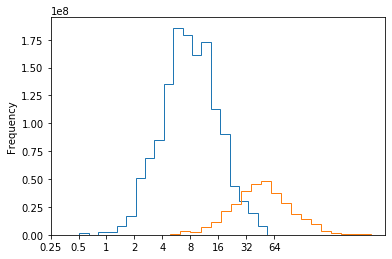

In [41]:
china2015.log10_income.plot.hist(histtype='step', bins=20, weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step', bins=20, weights=usa2015.weight)

levels = (0.25, 0.5, 1, 2, 4, 8, 16, 32, 64)
plt.xticks(np.log10(levels), levels)

## Two variables

In [42]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [43]:
poland = gapminder.query('country=="Poland"')

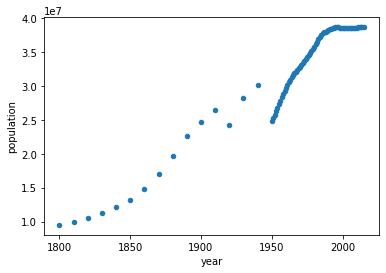

In [44]:
poland.plot.scatter('year', 'population')

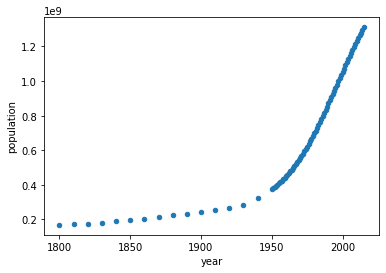

In [45]:
gapminder.query('country == "India"').plot.scatter('year', 'population')

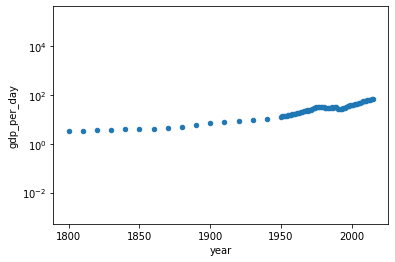

In [47]:
poland.plot.scatter('year', 'gdp_per_day', logy=True)

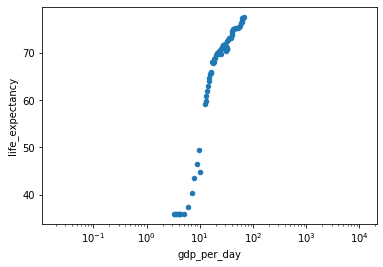

In [48]:
poland.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)

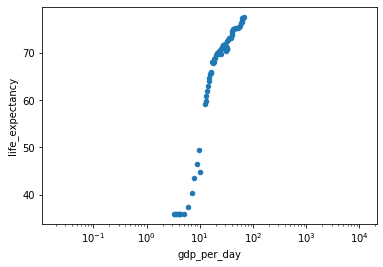

In [49]:
size = np.where(poland.year % 10 ==0 ,30,2)
poland.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)

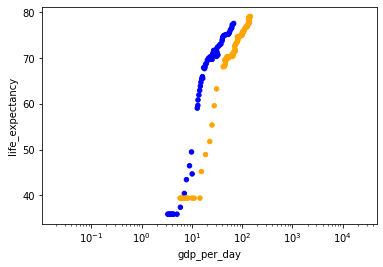

In [51]:
data = gapminder.query('(country == "Poland") or (country == "United States")')
size = np.where(data.year % 10 ==0 ,30,2)
color = np.where(data.country == 'Poland', 'blue', 'orange')
data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, c=color)

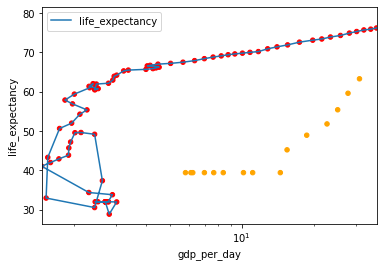

In [53]:
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 ==0 ,30,2)
color = np.where(data.country == 'China', 'red', 'orange')
ax = data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, c=color)
data[data.country =='China'].plot.line(x='gdp_per_day', y='life_expectancy', ax=ax)
